In [2]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 47kB/s 
     |████████████████████████████████| 491kB 41.6MB/s 
     |████████████████████████████████| 3.2MB 19.1MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


# Método de la matriz inversa para la regresión lineal

$$Ax=b$$

$$A^TAx = A^Tb$$

$$x = (A^TA)^{-1}A^Tb$$

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
session = tf.Session()

In [0]:
x_vals = np.linspace(0,10,100)
y_vals = x_vals + np.random.normal(0,1,100)

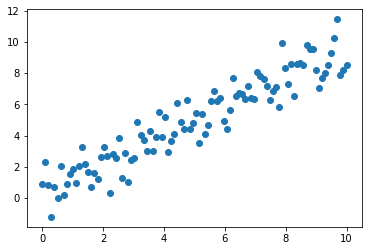

In [5]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")

In [0]:
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1,100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

In [0]:
A # objeto numericos

In [0]:
# convertimos los datos numericos a Tensores
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

$$x = (A^TA)^{-1}A^Tb$$

In [0]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)
solution_eval = session.run(solution)

In [0]:
# los coeficientes de la solucion
solution_eval

array([[0.99395256],
       [0.10398204]])

In [16]:
# El modelo:
slope = solution_eval[0][0]
intercept = solution_eval[1][0]
print(str(np.round(slope,3))+"x + "+str(np.round(intercept,3)))

0.915x + 0.429


In [0]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

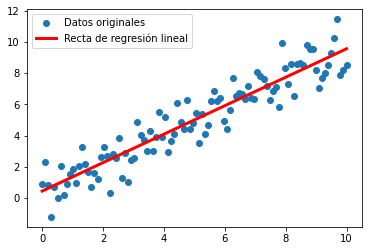

In [19]:
plt.plot(x_vals, y_vals, 'o', label = "Datos originales")
plt.plot(x_vals, best_fit, 'r-', label = "Recta de regresión lineal", linewidth = 3)
plt.legend(loc = "upper left")
plt.show()

# Método de la descomposición de Cholesky

$$A = LU$$
- $L$: matriz triangular superior
- $U$: matriz triangular inferior
- $L^T=U$

$$Ax=b$$

$$A^TAx=A^Tb$$

$$LUx=A^Tb$$

$$Ly=A^Tb$$
$$Ux=y$$

In [0]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [0]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [0]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)# solo devuelve la diangonal superior
tA_b = tf.matmul(tf.transpose(A_tensor), b_tensor)
y_sol = tf.matrix_solve(L, tA_b)
x_sol = tf.matrix_solve(tf.transpose(L), y_sol)

In [0]:
sol_eval = session.run(x_sol)

In [24]:
sol_eval

array([[0.91477318],
       [0.42900986]])

In [25]:
# metodo lineal por descomposicion Cholesky
slope = sol_eval[0][0]
intercept = sol_eval[1][0]
print(str(np.round(slope, 3))+"x+"+str(np.round(intercept,3)))

0.915x+0.429


In [0]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

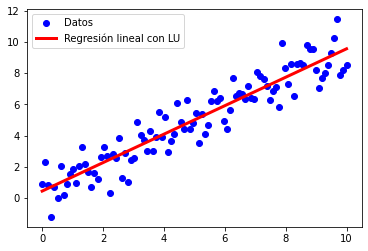

In [27]:
plt.plot(x_vals, y_vals, 'bo', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label = "Regresión lineal con LU", linewidth = 3)
plt.legend(loc="upper left")
plt.show()